## Importing scenario

In [1]:
import carla
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

In [2]:
client = carla.Client('localhost', 2000)

In [3]:
world = client.get_world()

In [4]:
world_map = world.get_map()

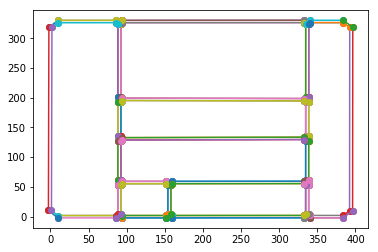

In [5]:
topology = world_map.get_topology()
for segment in topology:
    x1, y1 = segment[0].transform.location.x, segment[0].transform.location.y
    x2, y2 = segment[1].transform.location.x, segment[1].transform.location.y
    plt.plot([x1, x2], [y1, y2], marker = 'o')
plt.show()

In [6]:
topology = world_map.get_topology()
toplist = []
for segment in topology:
    x1, y1 = segment[0].transform.location.x, segment[0].transform.location.y
    x2, y2 = segment[1].transform.location.x, segment[1].transform.location.y
    toplist.append([(x1,y1),(x2,y2)])

In [7]:
len(world_map.get_topology())

160

In [8]:
import sys
sys.path.append('/home/praveen/programs/scenario_runner/')

In [9]:
from navigation.pathrouting.global_route_planner import GlobalRoutePlanner
from navigation.pathrouting.global_route_planner_dao import GlobalRoutePlannerDAO

dao = GlobalRoutePlannerDAO(world_map)
grp = GlobalRoutePlanner(dao)
grp.setup()

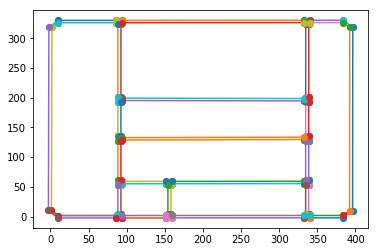

In [15]:
for edge in grp.graph.edges():
    n1, n2 = edge
    x1, y1 = grp.graph.nodes[n1]['vertex']
    x2, y2 = grp.graph.nodes[n2]['vertex']
    plt.plot([x1, x2], [y1, y2], marker = 'o')

In [10]:
# w = world_map.get_waypoint(carla.Location(x=120, y=1.68, z=0))

In [21]:
xo, yo = 120, -2.27
xd, yd = 334.7, 165
heading = (1, 0)
start = grp.localise(xo, yo, toplist)
end= grp.localise(xd, yd, grp.topology)
start = grp.align(start, grp.get_direction(start))
end = grp.align(end, grp.get_direction(end))

graph, idmap = grp.build_graph()
route = nx.shortest_path(graph, idmap[start[0]], idmap[end[1]])
route

[63, 34, 75, 76, 52, 26, 51, 6, 10, 12]

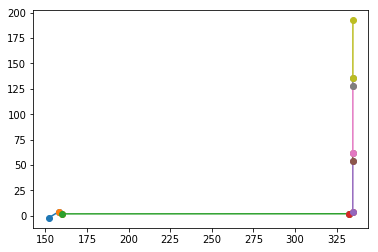

In [22]:
for i in range(1, len(route)):
    x1, y1 = graph.nodes[route[i-1]]['vertex']
    x2, y2 = graph.nodes[route[i]]['vertex']
    plt.plot([x1, x2], [y1, y2], marker = 'o')
plt.show()

In [13]:
grp.plan_route((xo, yo), heading, (xd, yd), graph, idmap, toplist)

['START',
 'GO_STRAIGHT',
 'GO_STRAIGHT',
 'LEFT',
 'LEFT',
 'LEFT',
 'GO_STRAIGHT',
 'STOP']